# Machine Learning

So this is a peripheral topic relative to most of the concepts we've studied so far this semester, but it's an increasingly important area of computational technology and it's important to be aware of emerging tools in case they might be useful for a problem you encounter in your work. The idea is to create mechanisms for a machine (computer) to "learn" from data. One type of machine learning is "supervised" learning, in which a series of "solved" cases is presented to the computer for "training". Once the computer achieves a certain level of skill in recognizing the solved cases, some "test" cases are presented and the result is validated (or not).

One of the most straightforward techniques for machine learning is inspired by the brain. The idea is to create artificial "neurons" that collect input from the various bits of data and produce an output. 


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
sub_frame = df[(df['Species']=='Iris-versicolor')|(df['Species']=='Iris-virginica')] # only two species
train_ix = rand(len(sub_frame))<0.8  # an array of random booleans, 80% true
train_df = sub_frame[train_ix]       # choose a random training set using the random index
test_df = sub_frame[True^train_ix]   # use the rest for testing (a^b = true if "a|b" but not "a&b")

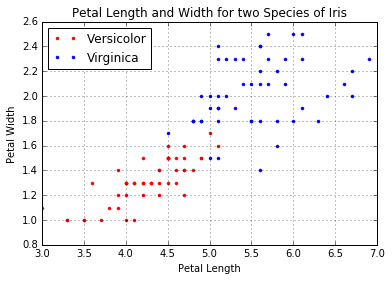

In [7]:
versi_df=sub_frame[sub_frame.Species=='Iris-versicolor']
virg_df=sub_frame[sub_frame['Species']=='Iris-virginica']
plot(versi_df.PetalLengthCm.values, versi_df.PetalWidthCm.values, 'r.', label="Versicolor")
plot(virg_df.PetalLengthCm.values, virg_df.PetalWidthCm.values, 'b.', label="Virginica")
xlabel("Petal Length")
ylabel("Petal Width")
title("Petal Length and Width for two Species of Iris")
legend(loc=2)
grid()

In [8]:
#
# x is a 5xN (~80 samples with 4 traits + offset)
#
x=array([
    ones(len(train_df)),
    train_df.PetalLengthCm.values,
    train_df.PetalWidthCm.values,
    train_df.SepalLengthCm.values,
    train_df.SepalWidthCm.values,]).T  # transpose to get in the right shape

#
# y is an Nx1, +1 if species == versi and -1 otherwise
#

y=where(train_df.Species=='Iris-versicolor',1,-1)

#
# testing sets
#

xt=array([
    ones(len(test_df)),
    test_df.PetalLengthCm.values,
    test_df.PetalWidthCm.values,
    test_df.SepalLengthCm.values,
    test_df.SepalWidthCm.values,]).T

yt=where(test_df.Species=='Iris-versicolor',1,-1)


Test performance: 1.000000


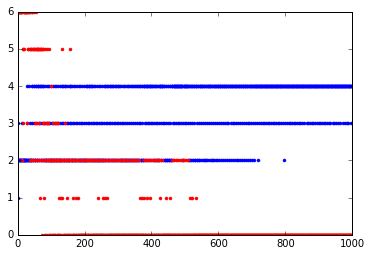

In [10]:
eta=0.1

def train(w):
    err_sum=0.0
    for j in range(len(y)):
        y_out = (x[j].dot(w)>=0.0) and 1 or -1  # make a prediction, +1 (versi) or -1 (vir)
        err = y[j]-y_out                        # compare to known species
        w += eta*err*x[j]                       # adjust the weights
        err_sum += abs(err) and 1 or 0          # calculate the total error this time
    return err_sum

def test(w):
    err_sum=0.0
    for j in range(len(yt)):
        y_out = (xt[j].dot(w)>=0.0) and 1 or -1  # make a prediction, +1 (versi) or -1 (vir)
        err = yt[j]-y_out                        # compare to known species
        err_sum += abs(err) and 1 or 0           # calculate the total error this time
    return err_sum

#
# first try ordered trainging
#

w = rand(5)*.05  # random array of "small" weights

err_test=[]
err_train=[]
train_iters=1000
for i in range(train_iters):
    err_train.append(train(w))
    err_test.append(test(w))

plot(range(train_iters),err_train,'b.')
plot(range(train_iters),err_test,'r.')

print("Test performance: %f" % (1.0 - err_test[-1]/len(yt)))

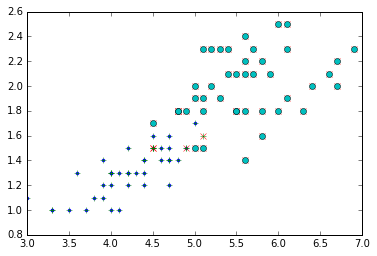

In [13]:
vals=[]
for i in range(len(x)):
    vals.append((x[i,1],x[i,2],x[i].dot(w),y[i]))
z=array(vals,).T
gr=z[2]>0.0
lt=True^gr
plot(z[0,gr],z[1,gr],'b.')
plot(z[0,lt],z[1,lt],'rx')
foo=z[3]>0
nfoo=True^foo
plot(z[0,foo],z[1,foo],'g+')
plot(z[0,nfoo],z[1,nfoo],'co')
